In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

In [255]:
train = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_train.csv')
test = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_test.csv')

In [256]:
frames = [train, test]
data = pd.concat(frames)


In [257]:
# Drop ID column
data.drop(['Id'], axis=1, inplace=True)

In [258]:
# Drop alley column
data.drop(['Alley'], axis=1, inplace=True)

In [259]:
# Drop poolQC column
data.drop(['PoolQC'], axis=1, inplace=True)

In [260]:
# Drop MiscFeatures column
data.drop(['MiscFeature'], axis=1, inplace=True)

In [261]:
# Drop Fence column
data.drop(['Fence'], axis=1, inplace=True)

In [262]:
# Drop MiscVal column
data.drop(['MiscVal'], axis=1, inplace=True)

In [263]:
# Drop FireplaceQA column
data.drop(['FireplaceQu'], axis=1, inplace=True)

In [264]:
# Drop values with no sale price

In [265]:
data['SalePrice'].replace('', np.nan, inplace=True)

In [266]:
data.dropna(subset=['SalePrice'], inplace=True)

In [267]:
# Separate X and y
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

In [268]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### EDA

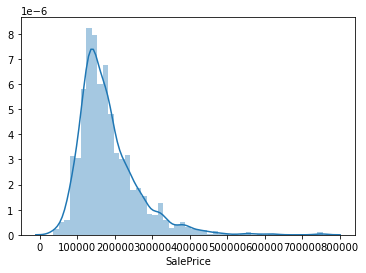

In [269]:
sns.distplot(data['SalePrice']);

We can see that the Sale Price is not normally distributed, so we will need to do a log transformation

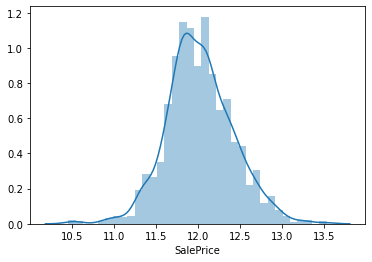

In [270]:
sns.distplot(np.log1p(data['SalePrice']))

### Missing Values

In [271]:
#check for missing values
data.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

We have 259 missing values in LotFrontage. We can fill missing LotFrontage values based on mean LotArea/LotFrontage value.

In [272]:
# Fill missing LotFrontage values based on median LotArea/LotFrontage value
data['LotFrontage'] = data['LotFrontage'].fillna((data['LotArea']/data['LotFrontage']).median())

In [273]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [274]:
# Fill missing MasVnrType values with None (mode)
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [275]:
# Fill missing MasVnrArea values with 0
data['MasVnrArea'] = data['MasVnrArea'].fillna(0.0)

In [276]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [277]:
# Fill missing Electrical value with mode
data['Electrical'] = data['Electrical'].fillna('SBrkr')

In [278]:
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [279]:
# Fill missing BsmtQual with None
data['BsmtQual'] = data['BsmtQual'].fillna('None')

In [280]:
# Fill missing BsmtCond with None
data['BsmtCond'] = data['BsmtCond'].fillna('None')

In [281]:
# Fill missing BsmtExposure with None
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')

In [282]:
# Fill missing BsmtFinType1 with None
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')

In [283]:
# Fill missing BsmtFinType2 with None
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')

In [284]:
# Fill missing GarageType with None
data['GarageType'] = data['GarageType'].fillna('None')

In [285]:
# Fill missing GarageQual with None
data['GarageQual'] = data['GarageQual'].fillna('None')

In [286]:
# Fill missing GarageCond with None
data['GarageCond'] = data['GarageCond'].fillna('None')

In [287]:
# Fill missing GarageFinish with None
data['GarageFinish'] = data['GarageFinish'].fillna('None')

In [288]:
# Drop GarageYearBuilt column
data.drop(['GarageYrBlt'], axis=1, inplace=True)

In [289]:
data['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [290]:
# What percent of properties have been remodeled?
(data['YearRemodAdd'] == data['YearBuilt']).sum()/len(data)

0.5232876712328767

In [291]:
data['Fireplaces'].unique()

array([0, 1, 2, 3])

In [292]:
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [293]:
data['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [294]:
data['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738])

### Baseline Model

In [295]:
dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X_train, y_train)
dummy_mean.score(X_test, y_test)

-0.0014293725084049136

### Feature Engineering

In [296]:
# Combine full and half bathrooms
data['Total_Bathrooms'] = data['FullBath'] + data['HalfBath']*.5

In [297]:
# Drop full & half bathrooms
data.drop(['FullBath'], axis=1, inplace=True)
data.drop(['HalfBath'], axis=1, inplace=True)

In [298]:
# Combine basement full and half bathrooms
data['Basement_Total_Bathrooms'] = data['BsmtFullBath'] + data['BsmtHalfBath']*.5

In [299]:
# Drop basement full & half bathrooms
data.drop(['BsmtFullBath'], axis=1, inplace=True)
data.drop(['BsmtHalfBath'], axis=1, inplace=True)

In [300]:
# Drop Pool Area - only 7 pools
data.drop(['PoolArea'], axis=1, inplace=True)

In [301]:
data['Utilities']

0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
1455    AllPub
1456    AllPub
1457    AllPub
1458    AllPub
1459    AllPub
Name: Utilities, Length: 1460, dtype: object

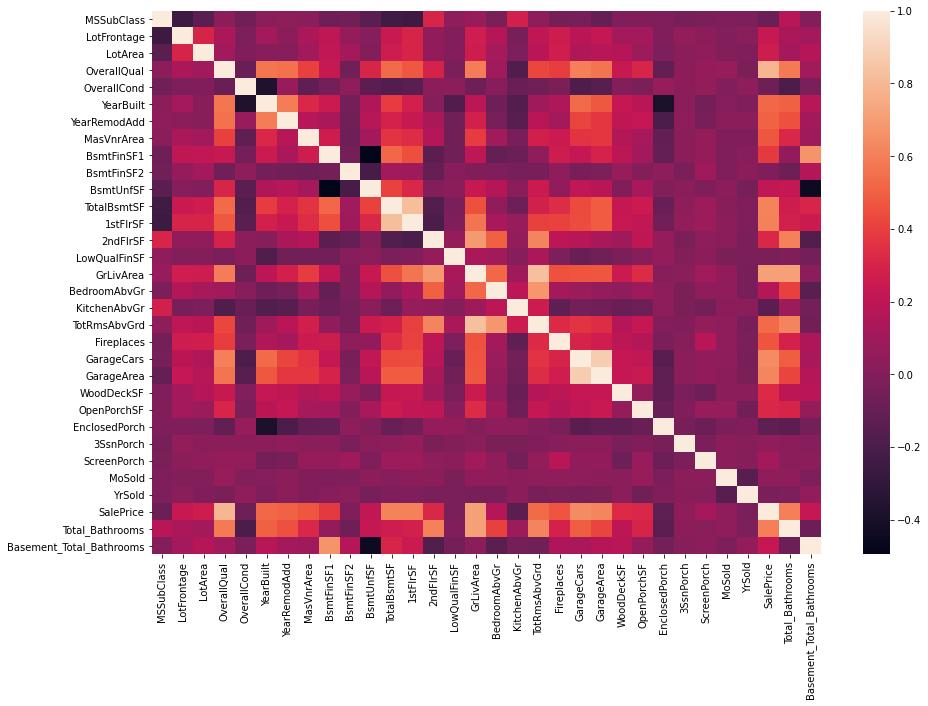

In [302]:
# Plot heatmap of feature correlation
plt.figure(figsize = (15,10))
sns.heatmap(data.corr())

We can see that overall quality is the highest correlating feature with Total Sale Price

In [308]:
# Change KitchenQual to numeric
data['KitchenQual'].unique()
data['KitchenQual'] = np.where((data.KitchenQual == 'Ex'), 5,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Gd'), 4,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'TA'), 3,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Fa'), 2,data.KitchenQual)

In [310]:
data['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [311]:
# Change ExterQual to numeric
data['ExterQual'] = np.where((data.ExterQual == 'Ex'), 5,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Gd'), 4,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'TA'), 3,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Fa'), 2,data.ExterQual)

In [313]:
# Change ExterCond to numeric
data['ExterCond'] = np.where((data.ExterCond == 'Ex'), 5,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Gd'), 4,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'TA'), 3,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Fa'), 2,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Po'), 1,data.ExterCond)

array([4, 3, 5, 2], dtype=object)